<a href="https://colab.research.google.com/github/anujsaxena/AIML/blob/main/AIML_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep learning using Tensorflow**

TensorFlow is an open source library for fast numerical computing.

It was created and is maintained by Google and released under the Apache open source license. The API is nominally for the Python programming language, although there is access to the underlying C++ API.

Unlike other numerical libraries intended for use in Deep Learning like Theano, TensorFlow was designed for use both in research and development and in production systems, not least RankBrain in Google search and the fun DeepDream project.

It can run on single CPU systems, GPUs as well as mobile devices and large scale distributed systems of hundreds of machines.

# **Keras**

Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result as fast as possible is key to doing good research.

Keras is:

1. Simple -- but not simplistic. Keras reduces developer cognitive load to free you to focus on the parts of the problem that really matter.
2. Flexible -- Keras adopts the principle of progressive disclosure of complexity: simple workflows should be quick and easy, while arbitrarily advanced workflows should be possible via a clear path that builds upon what you've already learned.
3. Powerful -- Keras provides industry-strength performance and scalability: it is used by organizations and companies including NASA, YouTube, or Waymo.

# **Load Data**

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


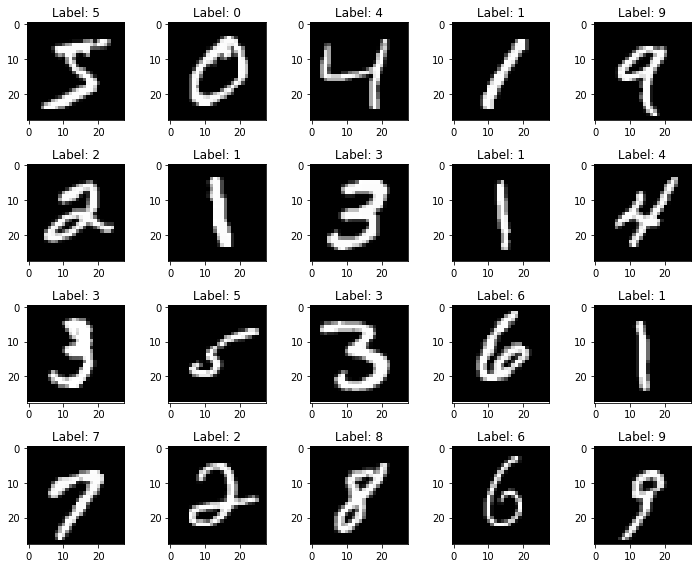

In [3]:
import matplotlib.pyplot as plt
num = 20
images = train_images[:num]
labels = train_labels[:num]
num_row=4
num_col =5
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
test_labels.shape

(10000,)

The core building block of neural networks is the layer, a data-processing module that you can think of as a filter for data. Some data goes in, and it comes out in a more useful form. Specifically, layers extract representations out of the data fed into them—hopefully, representations that are more meaningful for the problem at hand. Most of deep learning consists of chaining together simple layers that will implement a form of progressive data distillation. A deep-learning model is like a sieve for data processing, made of a succession of increasingly refined data filters—the layers. Here, our network consists of a sequence of two Dense layers, which are densely connected (also called fully connected) neural layers. The second (and last) layer is a 10-way softmax layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

To make the network ready for training, we need to pick three more things, as part of the compilation step:

1. A loss function —How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
2. An optimizer —The mechanism through which the network will update itself based on the data it sees and its loss function.
3. Metrics to monitor during training and testing — Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

In [8]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [9]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics =['accuracy'])

# **Loss Function**

Generally speaking, the loss function is used to compute the quantity that the the model should seek to minimize during training. For regression models, the commonly used loss function used is mean squared error function while for classification models predicting the probability, the loss function most commonly used is cross entropy. 

When fitting a neural network for classification, Keras provide the following three different types of cross entropy loss function:

1. binary_crossentropy: Used as a loss function for binary classification model. The binary_crossentropy function computes the cross-entropy loss between true labels and predicted labels.
2. categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels. The output label is assigned one-hot category encoding value in form of 0s and 1. The output label, if present in integer form, is converted into categorical encoding using keras.utils to_categorical method.
3. sparse_categorical_crossentropy: Used as a loss function for multi-class classification model where the output label is assigned integer value (0, 1, 2, 3…). This loss function is mathematically same as the categorical_crossentropy. It just has a different interface.
Follow the link for more details
https://keras.io/api/losses/



In [10]:
import numpy as np
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)
print("train_images shape:", train_images.shape)
print(train_images.shape[0], "train samples")
print(test_images.shape[0], "test samples")


train_images shape: (60000, 784, 1)
60000 train samples
10000 test samples


# **Create labels**

Before training, we’ll preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the [0, 1] interval. Previously, our training images, for instance, were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

In [11]:
#putting the code together

from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [12]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [13]:
batch_size =128
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split = 0.1)

Epoch 1/15
422/422 [==============================] - 14s 11ms/step - loss: 0.3774 - accuracy: 0.8848 - val_loss: 0.0892 - val_accuracy: 0.9768
Epoch 2/15
422/422 [==============================] - 4s 10ms/step - loss: 0.1226 - accuracy: 0.9621 - val_loss: 0.0591 - val_accuracy: 0.9847
Epoch 3/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0911 - accuracy: 0.9727 - val_loss: 0.0473 - val_accuracy: 0.9867
Epoch 4/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0767 - accuracy: 0.9757 - val_loss: 0.0470 - val_accuracy: 0.9878
Epoch 5/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0662 - accuracy: 0.9798 - val_loss: 0.0369 - val_accuracy: 0.9897
Epoch 6/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0600 - accuracy: 0.9821 - val_loss: 0.0378 - val_accuracy: 0.9895
Epoch 7/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0544 - accuracy: 0.9825 - val_loss: 0.0349 - val_accuracy: 0.9912


In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02460617758333683
Test accuracy: 0.9919000267982483
